## 客戶流失預測分析報告

在金融產業中，客戶流失對營運造成重大影響。透過資料驅動的分析方法，本研究目標為：

- 預測信用卡客戶是否會流失（Churn）
- 探索與流失相關的重要行為與屬性特徵
- 建立可用於客戶關係管理的預測模型

此研究可協助銀行提升客戶留存率、優化行銷策略並降低營運風險。

【資料集】* [BankChurners.csv](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers)<br>
【報告成員】711378905吳秉哲、711378912 蔡宜諠<br>

---
---

#### <font color='blue'>安裝主要的模組</font>

In [1]:
# -*- coding: utf-8 -*-
from platform import python_version
import os, time, glob, socket
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【工作目錄】{}".format(os.getcwd()))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【Python】{}".format(python_version()))
print("【sklearn】{}".format(sklearn.__version__))

# %autosave 120

【日期時間】2025/05/02 16:52:30
【工作目錄】d:\NTPU_class\ml\code
【主機名稱】MSI (10.20.70.63)
【Python】3.10.5
【sklearn】1.6.1


In [2]:
from matplotlib.font_manager import FontProperties  
winfont01 = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=12) 
winfont02 = FontProperties(fname=r"c:\windows\fonts\kaiu.ttf", size=12) 

# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定字型為微軟正黑體
# plt.rcParams['axes.unicode_minus'] = False                # 解決負號顯示問題

# macfont = FontProperties(fname="/Library/Fonts/Arial Unicode.ttf", size=10) 

---

#### <font color='blue'>資料讀取</font>

In [3]:
# df_raw = pd.read_csv(r"C:\Data\BankChurners.csv")
df_raw = pd.read_csv(r"D:\NTPU_class\ml\code\PyMLData\BankChurners.csv")
print(df_raw.columns)
print(df_raw.info())
df_raw.head()

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df_raw.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
# 把第一個id+奇奇怪怪的欄位刪掉
cols_to_drop = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df_raw = df_raw.loc[:, ~df_raw.columns.isin(cols_to_drop)]   # 這樣寫才不會重複刪除(用index), 也不會沒有這個column就抱錯

In [6]:
df_raw.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
print(Counter(df_raw["Attrition_Flag"]))  # 跟想像中一樣很不平衡呢!呵呵

Counter({'Existing Customer': 8500, 'Attrited Customer': 1627})


In [16]:
from collections import Counter
numeric_columns = df_raw.select_dtypes(include=['int', 'float']).columns.tolist()
# X = df_raw.iloc[:, ~df_raw.columns.isin(["Attrition_Flag"])].values  # 轉成 numpy ndarray
X = df_raw.iloc[:, df_raw.columns.isin(numeric_columns)].values   # TODO: 現在先讓他跑一下以後再回來處理其他的欄位
y = df_raw["Attrition_Flag"].map({"Existing Customer": 1, "Attrited Customer": 0}).values  # 轉成 numpy ndarray

In [17]:
from sklearn.preprocessing import StandardScaler
# 標準化一下
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [18]:
from sklearn.decomposition import PCA
# 隨便跑個pca看看分得怎樣
pca = PCA(n_components=None)     # 如果是none的話表示所有都會出現
pca.fit_transform(X_std)

array([[ 3.12445291e-01, -4.28597923e-01, -7.79386067e-01, ...,
        -3.80857841e-01,  1.84662981e-02,  6.03546993e-16],
       [-4.55926669e-01,  1.44083792e+00, -1.92598446e-02, ...,
        -3.79687181e-01,  5.82784939e-01,  1.12529311e-15],
       [-5.70576481e-01,  1.20133318e+00, -5.24723629e-01, ...,
         5.64650331e-01,  5.30574888e-01,  1.48492021e-15],
       ...,
       [ 5.77955358e-01, -2.04597035e-01, -2.12684763e-01, ...,
         8.01488231e-02,  1.31110155e+00,  6.85548786e-16],
       [ 6.90754750e-01,  1.61016165e-01, -1.27846652e+00, ...,
        -1.22829638e+00,  1.09511709e+00,  1.85518524e-16],
       [ 4.12195147e-01,  6.81363449e-01, -1.04663747e+00, ...,
         9.85062405e-01,  9.31392851e-01,  3.87845267e-16]],
      shape=(10127, 14))

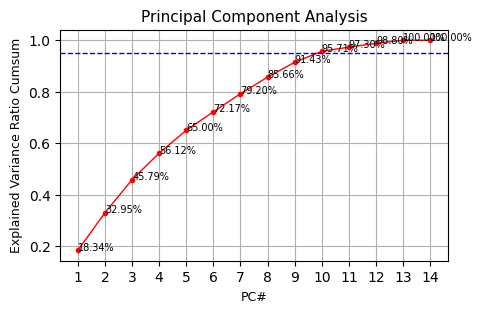

In [19]:
plt.figure(figsize=[5, 3])

plt.plot(range(1, len(pca.explained_variance_ratio_.cumsum())+1), pca.explained_variance_ratio_.cumsum(),
         linestyle="-", linewidth=1, color="red", marker=".")
plt.grid(True)
plt.xlabel("PC#", fontsize=9)
plt.ylabel("Explained Variance Ratio Cumsum", fontsize=9)
plt.title("Principal Component Analysis", fontsize=11)
plt.xticks(range(1, len(pca.explained_variance_ratio_.cumsum())+1))

for x_, y_ in zip(range(1, len(pca.explained_variance_ratio_.cumsum())+1), pca.explained_variance_ratio_.cumsum()) :
    plt.text(x_, y_, f"{y_:.2%}", fontsize=7)

# 繪製選擇的 PC 數
# plt.axvline(x=2, ymin=0, ymax=1, linestyle="--", linewidth=1, color="blue")    # 以要選擇幾個畫線
# 繪製選擇 PC 的總解釋百分比門檻值
plt.axhline(y=0.95, xmin=0, xmax=1, linestyle="--", linewidth=1, color="blue") # 以解釋率要到達多少去畫線
plt.show() 

In [20]:
import seaborn as sns
pca = PCA(n_components=2)         # 這裡的 2 是依據前面分析選擇出來的
X_new = pca.fit_transform(X_std)

print("【轉換前 X 的 shape】")
print(X_std.shape)
print("【轉換後 X 的 shape】")
print(X_new.shape)
print("【降維後每一個 PC 的解釋能力百分比】")
print(pca.explained_variance_ratio_)
print("【降維後每一個 PC 的解釋能力百分比累進】")
print(pca.explained_variance_ratio_.cumsum())
# 然後你就可以把他們當成新的特徵丟下去了


【轉換前 X 的 shape】
(10127, 14)
【轉換後 X 的 shape】
(10127, 2)
【降維後每一個 PC 的解釋能力百分比】
[0.18343028 0.14608437]
【降維後每一個 PC 的解釋能力百分比累進】
[0.18343028 0.32951465]


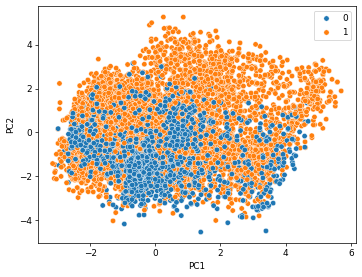

In [ ]:
sns.scatterplot(x=X_new[:, 0], y=X_new[:, 1], hue=y)
fig = plt.gcf()
fig.set_dpi(64)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
#  分的超級不好呢

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(
    n_components=2,    # 降維幾維
    n_iter=1000,       # 跌代次數
)
X_new = tsne.fit_transform(X_std)
print("【降維前 X shape】")
print(X_std.shape)
print("【降維後 X shape】")
print(X_new.shape)

c:\Users\USER\.pyenv\pyenv-win\versions\3.10.5\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


【降維前 X shape】
(10127, 14)
【降維後 X shape】
(10127, 2)


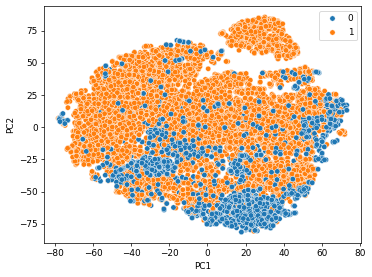

In [ ]:
sns.scatterplot(x=X_new[:, 0], y=X_new[:, 1], hue=y)
fig = plt.gcf()
fig.set_dpi(64)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
# 有分得比較好嗎 看不出來ㄏㄏ
# 好像沒有

In [25]:
model = LogisticRegression(penalty='l2',           # 懲罰項
                           tol=0.0001,             # tolerence 容忍門檻值
                           max_iter=100,           # 迭代次數(跑幾次)
                           C=1.0,                  # 就是懲罰項前面的 lambda 係數
                           random_state=None,      # seed
                           solver='lbfgs',         # 最佳化器，如何去找出來? 等下再說
                           multi_class='auto',     #  "ovr"(one-vs-rest) 表示二分類，"multinomial" 表示多分類
                           verbose=0,              # 顯示訊息量的多寡 0就是沒有
                           warm_start=False,       # 前面的記憶
                           n_jobs=-1,)           # cores 電腦 cpu 的核心數
# 如果沒辦法收斂可能是因為容忍直無法達標
# 這時候就要調整跌代次數


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [35]:
from sklearn.metrics import f1_score, precision_score, recall_score
import pandas as pd
from sklearn.metrics import confusion_matrix

model.fit(X_train, y_train)
print(f"train acc : {model.score(X_train, y_train):.2%}")
print(f"test acc : {model.score(X_test, y_test):.2%}")

# 預測結果
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 計算 F1 分數
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"train F1 score : {train_f1:.2f}")
print(f"test F1 score : {test_f1:.2f}")

# 計算混淆矩陣
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# 使用 pandas 將混淆矩陣轉換為 DataFrame，並為列標籤和行標籤設置標註
train_conf_matrix_df = pd.DataFrame(train_conf_matrix, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])
test_conf_matrix_df = pd.DataFrame(test_conf_matrix, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])

print("==================================")
# 顯示混淆矩陣表格
print("Train Confusion Matrix:")
print(train_conf_matrix_df)

print("\nTest Confusion Matrix:")
print(test_conf_matrix_df)

train acc : 89.98%
test acc : 89.49%
train F1 score : 0.94
test F1 score : 0.94
Train Confusion Matrix:
        Pred 0  Pred 1
True 0     735     565
True 1     247    6554

Test Confusion Matrix:
        Pred 0  Pred 1
True 0     172     155
True 1      58    1641


c:\Users\USER\.pyenv\pyenv-win\versions\3.10.5\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# X = data.drop(["account length", "area code", "churn"], axis=1, inplace=False).to_numpy()
# y = data["churn"].astype(int)

# print(X.shape)
# print(y.shape)
# print(Counter(y))      # 不平衡，建議可以進行 平衡 的特徵工程 (以後再說)

(3333, 14)
(3333,)
Counter({0: 2850, 1: 483})


In [9]:
scaler = MinMaxScaler()  # 標準化X 的單位, 可用來比較變數重要度.
X_std = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [11]:
model = LogisticRegression(penalty='l2',           # 懲罰項
                           dual=False,
                           tol=0.0001,             # tolerence 容忍門檻值
                           max_iter=100,           # 迭代次數(跑幾次)
                           C=1.0,                  # lambda 值
                           random_state=None,      # seed
                           solver='lbfgs',         # 最佳化器，如何去找出來? 等下再說
                           multi_class='auto',     # 
                           verbose=0,              # 顯示訊息量的多寡
                           warm_start=False, 
                           n_jobs=-1,)           # cores 電腦 cpu 的核心數

In [12]:
model.fit(X_train, y_train)
print(f"train acc : {model.score(X_train, y_train):.2%}")
print(f"test acc : {model.score(X_test, y_test):.2%}")

train acc : 85.97%
test acc : 85.16%


In [13]:
# AutoML 的概念, 把所有的都跑過, 找出Accuracy 最大值.
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
models = [LogisticRegression(solver=solver).fit(X_train, y_train) for solver in solvers]
scores = [model.score(X_train, y_train) for model in models]
print(scores)
print(f"最大值的index : {np.argmax(scores)}")
print(f"最大值的solver : {solvers[np.argmax(scores)]}")

[0.859714928732183, 0.8589647411852963, 0.8600900225056264, 0.859714928732183, 0.859714928732183, 0.859714928732183]
最大值的index : 2
最大值的solver : newton-cg


In [15]:
# Confusion Matrix. 混淆矩陣.

y_train_hat = model.predict(X_train)

mtx = pd.crosstab(index=y_train,            # actual
                  columns=y_train_hat,      # predicted
                  rownames=["Actual"],
                  colnames=["Predicted"],)
mtx

Predicted,0,1
Actual,,
0,2268,16
1,358,24


In [16]:
print(np.array(mtx).trace())           # 對角線相加
print(np.array(mtx).sum())             # 全部相加
print(np.array(mtx).trace() / np.array(mtx).sum())       # accuracy

2292
2666
0.859714928732183


#### <font color='blue'>香菇的分類(有毒性p、可食用e)</font>
- [Logistic Regression for Classifying Mushrooms](https://www.kaggle.com/sowbal/logistic-regression-for-classifying-mushrooms) <font color=#FF0000>【★★★★★】</font>

In [18]:
fname = 'C:/Data/PyMLData/mushrooms.csv'
data = pd.read_csv(fname)
data.head(3)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [45]:
# 【方法一】探究 X 使用 LabelEncoder : 學理上，這是錯誤的
fname = 'C:/Data/PyMLData/mushrooms.csv'
data = pd.read_csv(fname)

In [46]:
encoder = LabelEncoder()

for col in data.columns[1:] :
    data[col] = encoder.fit_transform(data[col])

X = data.drop(["class"], axis=1, inplace=False).to_numpy()
y = data["class"].to_numpy()
X

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [48]:
model = LogisticRegression(penalty='l2',           # 懲罰項
                           dual=False,
                           tol=0.0001,             # tolerence 容忍門檻值
                           max_iter=1000,           # 迭代次數(跑幾次)
                           C=1.0,                  # lambda 值
                           random_state=None,      # seed
                           solver='lbfgs',         # 最佳化器，如何去找出來? 等下再說
                           multi_class='auto',     # 
                           verbose=0,              # 顯示訊息量的多寡
                           warm_start=False, 
                           n_jobs=-1,)           # cores 電腦 cpu 的核心數
model.fit(X_train, y_train)
print(f"train acc : {model.score(X_train, y_train):.3%}")
print(f"test acc : {model.score(X_test, y_test):.3%}")

train acc : 95.138%
test acc : 94.769%


In [53]:
# 【方法二】探究 X 使用 One-Hot Encode : 學理上，這是正確的
fname = 'C:/Data/PyMLData/mushrooms.csv'
data = pd.read_csv(fname)

In [54]:
X = pd.get_dummies(data.drop(["class"], axis=1, inplace=False), drop_first=False, dtype=np.int16).to_numpy()
y = data["class"].to_numpy()
X

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [56]:
model = LogisticRegression(penalty='l2',           # 懲罰項
                           dual=False,
                           tol=0.0001,             # tolerence 容忍門檻值
                           max_iter=100,           # 迭代次數(跑幾次)
                           C=1.0,                  # lambda 值
                           random_state=None,      # seed
                           solver='lbfgs',         # 最佳化器，如何去找出來? 等下再說
                           multi_class='auto',     # 
                           verbose=0,              # 顯示訊息量的多寡
                           warm_start=False, 
                           n_jobs=-1,)           # cores 電腦 cpu 的核心數
model.fit(X_train, y_train)
print(f"train acc : {model.score(X_train, y_train):.3%}")
print(f"test acc : {model.score(X_test, y_test):.3%}")

train acc : 100.000%
test acc : 100.000%


In [57]:
# 儲存已訓練模型.

import joblib
joblib.dump(value=model, filename=r"C:\Data\model.job", compress=0,)

['C:\\Data\\model.job']

In [58]:
# 讀取模型 部屬.

model_2 = joblib.load(filename=r"C:\Data\model.job")

In [59]:
y_test_hat = model_2.predict(X_test)

df = pd.DataFrame(X_test)
df["predicted"] = y_test_hat
print(f"test acc : {model_2.score(X_test, y_test):.3%}")

test acc : 100.000%


### <font color=#0000FF>【wdbc威斯康辛乳腺癌診斷資料】</font>
威斯康辛乳腺癌診斷資料 : <https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data>

1. ID number
2. Diagnosis (M = malignant, B = benign) : （M =惡性，B =良性）

3-32 , Ten real-valued features are computed for each cell nucleus:
3. radius (mean of distances from center to points on the perimeter) : 半徑（從中心到外圍點的距離的平均值）
4. texture (standard deviation of gray-scale values) : 紋理（灰度值的標準偏差）
5. perimeter : 周長
6. area : 面積
7. smoothness (local variation in radius lengths) : 平滑度（半徑長度的局部變化）
8. compactness (perimeter^2 / area - 1.0) : 密實度（周長^ 2 /面積-1.0）
9. concavity (severity of concave portions of the contour) : 凹度（輪廓凹部的嚴重程度）
10. concave points (number of concave portions of the contour) : 凹點（輪廓的凹入部分的數量）
11. symmetry : 對稱
12. fractal dimension ("coastline approximation" - 1) : 分形維數（“海岸線近似”-1）



In [ ]:
uri = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
colnames = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", 
           "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean",
           "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se",
           "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se",
           "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst",
           "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst",
           "symmetry_worst", "fractal_dimension_worst"]
data = pd.read_csv(uri, header=None,names=colnames)
print(data.shape)
print(data.columns)

### <font color=#FF0000>Multinomial Logistic Regression</font>
- [Multinomial Logistic Regression With Python](https://machinelearningmastery.com/multinomial-logistic-regression-with-python/?fbclid=IwAR0zip9tm11LtsigbwtmePHMjRtwS7v4tHjr8ZIvNpgATnuX6M9xpHpxROc) <font color=#FF0000>【★★★★★】</font>
    - Binomial Logistic Regression: Standard logistic regression that predicts a binomial probability (i.e. for two classes) for each input example.
    - Multinomial Logistic Regression: Modified version of logistic regression that predicts a multinomial probability (i.e. more than two classes) for each input example.

#### <font color='red'>以下這個資料集有三種類別可以使用於此</font>
- [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) : 三個類別

In [ ]:
dataset = sklearn.datasets.load_wine()
X = dataset.data
y = dataset.target
print(X.shape, y.shape)
print(Counter(y))
print(dataset.feature_names)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')